In [1]:
%matplotlib inline


# Logistic Regression 3-class Classifier


Show below is a logistic-regression classifiers decision boundaries on the
first two dimensions (sepal length and width) of the `iris
<https://en.wikipedia.org/wiki/Iris_flower_data_set>`_ dataset. The datapoints
are colored according to their labels.




In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

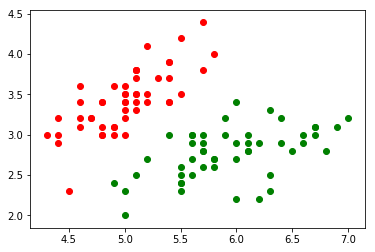

In [3]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data
X = iris.data[:100, :2]  # we only take the first two features.
Y = iris.target[:100]

for i in range(100):
    if Y[i]==0:
        plt.scatter(X[i,0], X[i,1], color = 'r') 
    else:
        plt.scatter(X[i,0], X[i,1], color = 'g')

In [4]:
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)



LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

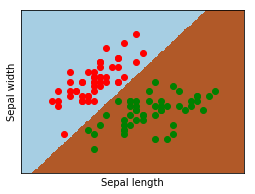

In [5]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
for i in range(100):
    if Y[i]==0:
        plt.scatter(X[i,0], X[i,1], color = 'r') 
    else:
        plt.scatter(X[i,0], X[i,1], color = 'g')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()